**Decission Tree**

Importing libraries

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Loading dataset

In [122]:
df = pd.read_csv("/content/telephone-user-KNN.csv")
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


Data Visualization

array([[<Axes: title={'center': 'region'}>,
        <Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'marital'}>,
        <Axes: title={'center': 'address'}>,
        <Axes: title={'center': 'income'}>],
       [<Axes: title={'center': 'ed'}>,
        <Axes: title={'center': 'employ'}>,
        <Axes: title={'center': 'retire'}>],
       [<Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'reside'}>,
        <Axes: title={'center': 'custcat'}>]], dtype=object)

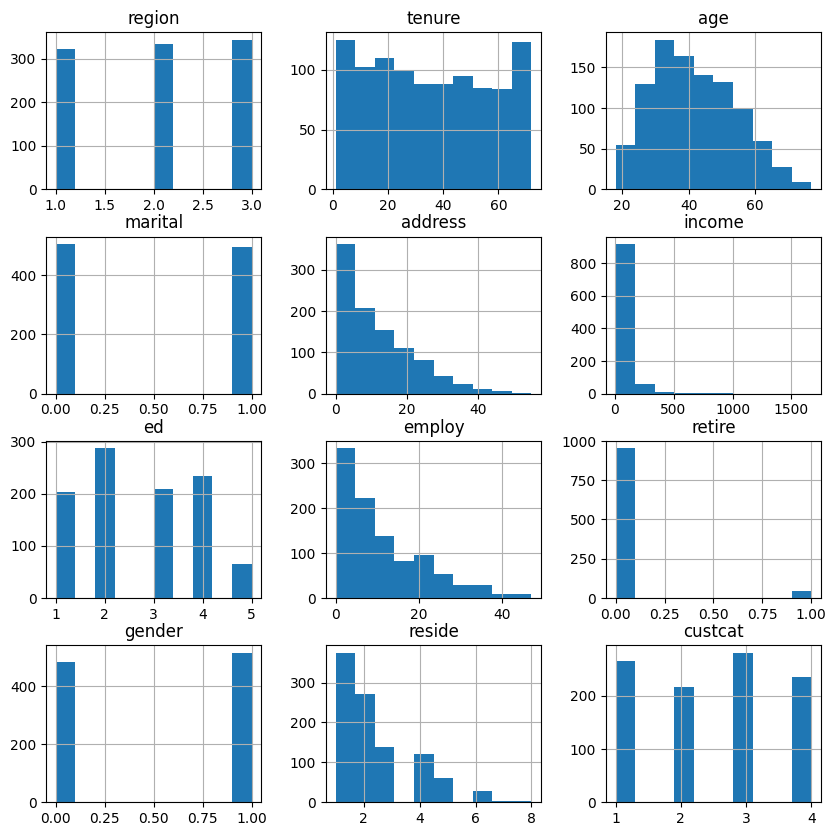

In [123]:
df.hist(figsize=(10, 10))

Step 1: Data Preprocessing


In [124]:
df['custcat'].value_counts()

,count
custcat,
3,281
1,266
4,236
2,217


Feature and Target Selection

In [125]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values
y = df['custcat'].values

Normalization

In [126]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

Step 2: Train/test split

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 3: Algorithm Setup

KNN

In [128]:
from sklearn.neighbors import KNeighborsClassifier
k = 9

Step 4: Model Fitting

In [129]:
model = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)

Step 5: Predictions

In [130]:
y_pred = model.predict(X_test)

Step 6: Evaluation

In [131]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Knn Accuracy: {accuracy}")
print(f"\nClassification Report:\n {classification_report(y_test, y_pred)}")
print(f"\nConfusion Matrix:\n {confusion_matrix(y_test, y_pred)}")

Knn Accuracy: 33.0

Classification Report:
               precision    recall  f1-score   support

           1       0.34      0.42      0.38        60
           2       0.25      0.21      0.23        39
           3       0.42      0.45      0.44        55
           4       0.22      0.17      0.20        46

    accuracy                           0.33       200
   macro avg       0.31      0.31      0.31       200
weighted avg       0.32      0.33      0.32       200


Confusion Matrix:
 [[25 10 16  9]
 [13  8  9  9]
 [14  6 25 10]
 [21  8  9  8]]
